In [6]:
import sys
print(f"Using Python Version: {(sys.version).split()[0]}")

Using Python Version: 3.12.9


In [7]:
from collections.abc import Callable
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from collections.abc import Callable

0, 1.5
1, 1.25
2, 1.375
3, 1.4375
4, 1.46875
5, 1.453125
6, 1.4609375
7, 1.45703125
8, 1.458984375
9, 1.4580078125
10, 1.45849609375
11, 1.458740234375
12, 1.4586181640625
13, 1.45855712890625
14, 1.458587646484375
15, 1.4586029052734375
16, 1.4586105346679688
17, 1.4586143493652344
18, 1.4586162567138672
19, 1.4586153030395508
20, 1.4586148262023926
21, 1.4586150646209717
22, 1.4586149454116821
23, 1.458615005016327
24, 1.4586150348186493
25, 1.458615019917488
26, 1.4586150273680687
The value of ln(4.3) is approximately 1.4586150273680687
Observed steps: 27
Theoretical minimum steps: 27
Ratio (observed/theoretical): 1.00


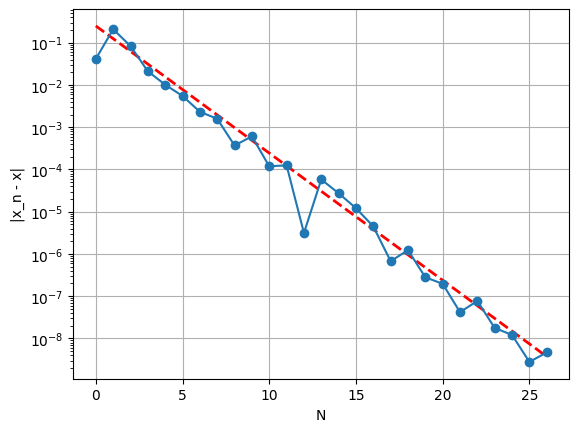

In [15]:
# Problem 5

def bisection(func: Callable[[float],float], ab: list[float], eps: float = 1.e-08, N_max: int = 500) -> float: #eps 很小的数
    """Performs bisection 

    Arguments:
      func: the function for which is root is to be found
      ab: list of the form [a,b], the initial interval in which a root lies
      eps: convergence tolerance for the smallest interval size
      N_max: maximum iterations
    """

    a = ab[0] 
    b = ab[1]
    f_a = func(a)
    temp = []
    
    if np.sign(f_a)*np.sign(func(b)) > 0:
        raise ValueError(
            "Initial Inverval [a,b] must be such that f(a)f(b) < 0") 
    for n in range(N_max):
        p = a + 0.5*(b-a)
        print(f"{n}, {p}")
        temp.append(p)
        f_p = func(p)

        if 0.5*(b-a) < eps or abs(f_p) < eps:
            return temp

        if np.sign(f_a)*np.sign(f_p) > 0:
            f_a = f_p
            a = p
        else:
            b = p

    raise RuntimeError(f"Reached maximum iteration {N_max = }")


temp = bisection(lambda x: np.exp(x)-4.3, [1,2])
    
print("The value of ln(4.3) is approximately",temp[-1])

# Compare observed vs theoretical number of bisection steps
import math

x_ex=np.log(4.3)

a, b = 1, 2  # initial interval
n_observed = len(temp)

tol = 1.e-8
n_theoretical = math.ceil(math.log2((b - a) / tol))

print(f"Observed steps: {n_observed}")
print(f"Theoretical minimum steps: {n_theoretical}")
print(f"Ratio (observed/theoretical): {n_observed/n_theoretical:.2f}")

theoretical_error = [(b - a) / (2 ** (n + 1)) for n in range(1, len(temp) + 1)]
plt.semilogy(range(len(temp)), theoretical_error, 'r--', label='Theoretical error bound', linewidth=2)

plt.semilogy(range(len(temp)), [abs(x_ex - x) for x in temp], marker='o', label='|x_n - x|')
plt.xlabel('N')
plt.ylabel('|x_n - x|')
plt.grid()

In [59]:
# Problem 6

def fixed_point(func: Callable[[float],float], x: float, eps: float = 1.e-08, N_max: int = 100) -> list[float]:
    """fixed-point iteration for scalar function

    Arguments:
      func: The function for which the fixed-point is to be found
      x: initial guess 
      eps: convergence tolerance (default 1.0e-08)
      N_max: maximum number of iterations (default 100)

    Returns:
      conv_history: convergence history of the fixed-point iteration
    """

    f_val = func(x)
    counter = 0
    conv_history = [x]

    # print(f"{counter:4d} {x:.6e} {abs(f_val):.2e}")

    delta = f_val -x
    
    while abs(delta) > eps:

        x = f_val
        f_val = func(x)
        delta = f_val-x
        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val-x):.2e}")

        if counter >= N_max:
            raise RuntimeError(f"Failed to converge after {N_max} iterations")

    return conv_history

In [60]:
conv_history_fp = fixed_point(func=lambda x: np.cos(np.log(x+1)), x=0.1)
print("The print approximation to the fixed point with an absolute error at least 10^-2 is",conv_history_fp[-1])

   1 9.954614e-01 2.25e-01
   2 7.706886e-01 7.05e-02
   3 8.411617e-01 2.17e-02
   4 8.194207e-01 6.75e-03
   5 8.261714e-01 2.09e-03
   6 8.240791e-01 6.49e-04
   7 8.247280e-01 2.01e-04
   8 8.245268e-01 6.24e-05
   9 8.245892e-01 1.93e-05
  10 8.245698e-01 6.00e-06
  11 8.245758e-01 1.86e-06
  12 8.245740e-01 5.77e-07
  13 8.245746e-01 1.79e-07
  14 8.245744e-01 5.54e-08
  15 8.245744e-01 1.72e-08
  16 8.245744e-01 5.33e-09
The print approximation to the fixed point with an absolute error at least 10^-2 is 0.8245744203208293


In [5]:
# Problem 8
def bisection(func: Callable[[float],float], ab: list[float], eps: float = 1.e-08, N_max: int = 500) -> float: #eps 很小的数
    """Performs bisection 

    Arguments:
      func: the function for which is root is to be found
      ab: list of the form [a,b], the initial interval in which a root lies
      eps: convergence tolerance for the smallest interval size
      N_max: maximum iterations
    """

    a = ab[0] 
    b = ab[1]
    f_a = func(a)
    temp = []
    
    if np.sign(f_a)*np.sign(func(b)) > 0:
        raise ValueError(
            "Initial Inverval [a,b] must be such that f(a)f(b) < 0") 

    for n in range(N_max):
        p = a + 0.5*(b-a)
        print(f"{n}, {p}")
        temp.append(p)
        f_p = func(p)

        if 0.5*(b-a) < eps or abs(f_p) < eps:
            return temp

        if np.sign(f_a)*np.sign(f_p) > 0:
            f_a = f_p
            a = p
        else:
            b = p

    raise RuntimeError(f"Reached maximum iteration {N_max = }")


temp = bisection(lambda x: 9.807 * ((np.exp(x) - np.exp(-x)) / 2 - np.sin(x)) + x**2, [-0.35,0.3])
    
print("The rate w is approximately",temp[-1])

0, -0.025000000000000022
1, -0.1875
2, -0.26875
3, -0.30937499999999996
4, -0.2890625
5, -0.29921875
6, -0.30429687499999997
7, -0.30683593749999993
8, -0.30556640625
9, -0.30620117187499996
10, -0.30588378906249997
11, -0.30604248046874993
12, -0.305963134765625
13, -0.3059234619140625
14, -0.3059036254882812
15, -0.30589370727539056
16, -0.3058986663818359
17, -0.30590114593505857
18, -0.3058999061584472
19, -0.3059005260467529
20, -0.30590083599090573
21, -0.3059006810188293
22, -0.30590075850486753
The rate w is approximately -0.30590075850486753


In [10]:
# Problem 9
def bisection(func: Callable[[float], float], ab: list[float], eps: float = 1.e-08, N_max: int = 500) -> list[float]:
    """Performs bisection method to find root of function"""

    a = ab[0]  
    b = ab[1]  
    f_a = func(a)
    temp = []
    
    if np.sign(f_a) * np.sign(func(b)) > 0:
        raise ValueError(
            "Initial Interval [a,b] must be such that f(a)f(b) < 0")  

    for n in range(N_max):
        p = a + 0.5 * (b - a)
        print(f"{n}, {p}")
        temp.append(p)
        f_p = func(p)

        if 0.5 * (b - a) < eps or abs(f_p) < eps:
            return temp

        if np.sign(f_a) * np.sign(f_p) > 0:
            f_a = f_p
            a = p
        else:
            b = p

    raise RuntimeError(f"Reached maximum iteration {N_max}")


def f(x):
    return (0.1**2)*9.807/(0.1488**2) * (1 - np.exp(-1.488*x)) + 100 - 9.807*x/1.488


print(f"f(5) = {f(5)}")
print(f"f(10) = {f(10)}")
print(f"f(15) = {f(15)}")
print(f"f(20) = {f(20)}")


try:
    temp = bisection(f, [15, 20])  
    print("Root found:", temp[-1])
except ValueError as e:
    print(e)
# temp = bisection(lambda x: (0.1**2)*9.807/(0.1488**2) * (1 - np.exp(-1.488*x)) +100- 9.807*x/1.488, [5,10])

print("The time (t second) is approximately",temp[-1])

f(5) = 71.47302094808092
f(10) = 38.52199162183102
f(15) = 5.568364116341797
f(20) = -27.385264915019604
0, 17.5
1, 16.25
2, 15.625
3, 15.9375
4, 15.78125
5, 15.859375
6, 15.8203125
7, 15.83984375
8, 15.849609375
9, 15.8447265625
10, 15.84716796875
11, 15.845947265625
12, 15.8453369140625
13, 15.84503173828125
14, 15.844879150390625
15, 15.844802856445312
16, 15.844841003417969
17, 15.844860076904297
18, 15.844869613647461
19, 15.844874382019043
20, 15.844876766204834
21, 15.84487795829773
22, 15.844878554344177
23, 15.844878852367401
24, 15.84487870335579
25, 15.844878777861595
26, 15.844878740608692
Root found: 15.844878740608692
The time (t second) is approximately 15.844878740608692


In [34]:
# Problem 10
def bisection(func: Callable[[float], float], ab: list[float], eps: float = 1.e-08, N_max: int = 500) -> list[float]:
    """Performs bisection method to find root of function"""

    a = ab[0]  
    b = ab[1]  
    f_a = func(a)
    temp = []
    
    if np.sign(f_a) * np.sign(func(b)) > 0:
        raise ValueError(
            "Initial Interval [a,b] must be such that f(a)f(b) < 0")  

    for n in range(N_max):
        p = a + 0.5 * (b - a)
        print(f"{n}, {p}")
        temp.append(p)
        f_p = func(p)

        if 0.5 * (b - a) < eps or abs(f_p) < eps:
            return temp

        if np.sign(f_a) * np.sign(f_p) > 0:
            f_a = f_p
            a = p
        else:
            b = p

    raise RuntimeError(f"Reached maximum iteration {N_max}")


def f(x):
    return 500*x-(1+x)**240+1


print(f"f(0.005) = {f(0.005)}")
print(f"f(0.0055) = {f(0.0055)}")
print(f"f(0.0057) = {f(0.0057)}")
print(f"f(0) = {f(0)}")

try:
    temp = bisection(f, [0.0055, 0.0057])  # 这里 ab = [5, 10]
    print("Root found:", temp[-1])
except ValueError as e:
    print(e)
# temp = bisection(lambda x: (0.1**2)*9.807/(0.1488**2) * (1 - np.exp(-1.488*x)) +100- 9.807*x/1.488, [5,10])

print("The minimal monthly interest is approximately",temp[-1])

f(0.005) = 0.18979552419263612
f(0.0055) = 0.020093167966220626
f(0.0057) = -0.0622628960894942
f(0) = 0
0, 0.0056
1, 0.005549999999999999
2, 0.005575
3, 0.0055625
4, 0.0055562499999999996
5, 0.005553124999999999
6, 0.005551562499999999
7, 0.005550781249999999
8, 0.005551171874999999
9, 0.005550976562499999
10, 0.005550878906249999
11, 0.005550830078124999
12, 0.005550805664062499
13, 0.00555079345703125
14, 0.0055507873535156245
Root found: 0.0055507873535156245
The minimal monthly interest is approximately 0.0055507873535156245
